## In this notebook we will focus on cleaning fetched dataset

#### Importing libearies

In [3]:
import pandas as pd
import numpy as np

#### Loading csv file and starting the cleansing phase

In [127]:
df = pd.read_csv('D:/AIjourney/projects/Pride Ads Project/CSV/pride_ads_1.csv')

df.head(10)

,Brand,Name,Model,Trim,Year,Mileage,Fuel,Transmission,Body status,Price
0,pride,صندوق دار,پراید,دنده ای,1389,355000,بنزینی,دنده ای,گلگیر تعویض,345000000
1,pride,صندوق دار,پراید,دنده ای,1386,325000,بنزینی,دنده ای,گلگیر رنگ,320000000
2,pride,151,پراید,GX,1404,0,بنزینی,دنده ای,بدون رنگ,680000000
3,pride,131,پراید,SE,1398,12000,بنزینی,دنده ای,گلگیر رنگ,0
4,pride,صندوق دار,پراید,دنده ای,1389,کارکرده,بنزینی,دنده ای,بدون رنگ,0
5,pride,131,پراید,SE,1399,40000,بنزینی,دنده ای,گلگیر تعویض,560000000
6,pride,131,پراید,SE,1398,88000,بنزینی,دنده ای,دو لکه رنگ,600000000
7,pride,132,پراید,SE,1390,332000,بنزینی,دنده ای,یک لکه رنگ,370000000
8,pride,151,پراید,SE,1404,0,بنزینی,دنده ای,بدون رنگ,0
9,pride,151,پراید,SE,1398,109000,بنزینی,دنده ای,بدون رنگ,525000000


### Cleaning steps will be:
#### 1. Delete rows with Price column = 0
##### Any other 'Missing Values Handling' did not came up to my mind since ads include second-hand cars and price is set to zero! Probably car owner's mistake.
#### 2. Set Trim column to 'ساده' for cars which their name is 'صندوق دار'
##### - Based on domain knowledge analysis
#### 3. Replace Mileage column with a convenient value for the rows where Mileage is 'کارکرده'
##### As it was mentioned in previous step, Mileage contains both numerical and string values. We will solve this issue in this step.

---
### Step 1: 

In [129]:
#df['Price'].value_counts()            # 44 rows have price of 0 --- USELESS!

df = df[df['Price'] != 0]

print('New shape:', df.shape)
print(df['Price'].value_counts())           # No more 0 price values...!

New shape: (539, 10)
Price
300000000    17
350000000    16
320000000    16
500000000    12
550000000    12
             ..
215000000     1
790000000     1
125000000     1
281000000     1
519000000     1
Name: count, Length: 162, dtype: int64


In [131]:
df.head()

,Brand,Name,Model,Trim,Year,Mileage,Fuel,Transmission,Body status,Price
0,pride,صندوق دار,پراید,دنده ای,1389,355000,بنزینی,دنده ای,گلگیر تعویض,345000000
1,pride,صندوق دار,پراید,دنده ای,1386,325000,بنزینی,دنده ای,گلگیر رنگ,320000000
2,pride,151,پراید,GX,1404,0,بنزینی,دنده ای,بدون رنگ,680000000
5,pride,131,پراید,SE,1399,40000,بنزینی,دنده ای,گلگیر تعویض,560000000
6,pride,131,پراید,SE,1398,88000,بنزینی,دنده ای,دو لکه رنگ,600000000


##### As you can see the original 3rd and 4th rows are deleted as an instance, showing that the dataset doesn't contain zero values in Price column anymore.

---
### Step 2:

In [137]:
#df.loc[df['Name'] == 'صندوق دار', 'Trim'] = 'صندوقدار'
df.loc[df['Trim'] == 'دنده ای', 'Trim'] = 'ساده'

print(df.shape)
df.head(5)

# temp = df.loc[df['Name'] == 'صندوق دار']
# print(type(temp))
# temp.shape

(539, 10)


,Brand,Name,Model,Trim,Year,Mileage,Fuel,Transmission,Body status,Price
0,pride,صندوق دار,پراید,ساده,1389,355000,بنزینی,دنده ای,گلگیر تعویض,345000000
1,pride,صندوق دار,پراید,ساده,1386,325000,بنزینی,دنده ای,گلگیر رنگ,320000000
2,pride,151,پراید,GX,1404,0,بنزینی,دنده ای,بدون رنگ,680000000
5,pride,131,پراید,SE,1399,40000,بنزینی,دنده ای,گلگیر تعویض,560000000
6,pride,131,پراید,SE,1398,88000,بنزینی,دنده ای,دو لکه رنگ,600000000


---
### Step 3:
#### My plan for step 3 is to actually replace the rows with Mileage value of 'کارکرده' with a suitable and logical number. I want to put all the rows with numbered Mileage in a new dataframe, calculate the average Mileage for cars that were manufacture between the years of 1370-1390, 1390-1400 and 1400-1404, and then set those values to the Mileage column of 'کارکرده' rows according to their manufactured year column in the main DataFrame.

In [139]:
df['Mileage'].value_counts()    # 33 rows with Mileage value of 'کارکرده'

Mileage
0          50
کارکرده    33
300000     23
200000     20
250000     14
           ..
7000        1
49          1
13000       1
60000       1
21000       1
Name: count, Length: 209, dtype: int64

Axes(0.125,0.11;0.775x0.77)


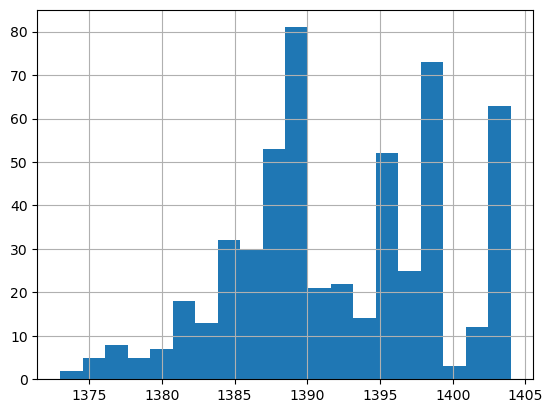

In [141]:
print(df['Year'].hist(bins=20))            # Calculate median of Mileage based on year periods for replacements..

In [143]:

karkarde_mask = df['Mileage'] == 'کارکرده'       # containts True/False in a column vector
df_karkarde = df[karkarde_mask].copy()
df_normal = df[~karkarde_mask].copy()         # DF which contains Mileage values other than 'کارکرده'

df_normal['Mileage'] = pd.to_numeric(df_normal['Mileage'], errors='coerce')      # It was string so we converted it to int

def get_year_group(year):
    if 1370 <= year <= 1380:
        return 'group_1370_1380'
    elif 1381 <= year <= 1390:
        return 'group_1381_1390'
    elif 1391 <= year <= 1400:
        return 'group_1391_1400'
    elif 1401 <= year <= 1404:
        return 'group_1401_1404'
    else:
        return 'other'

df_normal['Year_Group'] = df_normal['Year'].apply(get_year_group)

mileage_by_group = df_normal.groupby('Year_Group')['Mileage'].median()

print("Median mileage by year group:")
print(mileage_by_group)
print(f"\nOverall median mileage: {df_normal['Mileage'].median():.0f}")

Median mileage by year group:
Year_Group
group_1370_1380    295500.0
group_1381_1390    300000.0
group_1391_1400    147000.0
group_1401_1404         0.0
Name: Mileage, dtype: float64

Overall median mileage: 200000


In [72]:
# type(mileage_by_group)
# mileage_by_group.shape
# mileage_by_group.head()

In [145]:

def impute_mileage(row):
    year = row['Year']

    if 1370 <= year <= 1380:
        return mileage_by_group.get('group_1370_1380', df_normal['Mileage'].median())
    elif 1381 <= year <= 1390:
        return mileage_by_group.get('group_1381_1390', df_normal['Mileage'].median())
    elif 1391 <= year <= 1400:
        return mileage_by_group.get('group_1391_1400', df_normal['Mileage'].median())
    elif 1401 <= year <= 1404:
        return mileage_by_group.get('group_1401_1404', df_normal['Mileage'].median())
    else:
        return df_normal['Mileage'].median()          # for outliers of Mileage column: neither 'کارکرده' nor numbers!

df_karkarde['Mileage'] = df_karkarde.apply(impute_mileage, axis=1)

# Combine 
df_cleaned = pd.concat([df_normal.drop('Year_Group', axis=1), df_karkarde], ignore_index=True)
df_cleaned['Mileage'] = pd.to_numeric(df_cleaned['Mileage'])       # Converting Mileage column to int

# Summary statistics
print(f"\n=== Cleaning Summary ===")
print(f"Original dataset rows: {len(df)}")
print(f"Rows with 'کارکرده' mileage: {len(df_karkarde)}")
print(f"Rows with normal mileage: {len(df_normal)}")
print(f"Cleaned dataset rows: {len(df_cleaned)}")

# Verify no 'کارکرده' values remain
unique_mileages = df_cleaned['Mileage'].apply(lambda x: isinstance(x, (int, float)))
print(f"\nAll mileage values are numeric: {unique_mileages.all()}")


=== Cleaning Summary ===
Original dataset rows: 539
Rows with 'کارکرده' mileage: 33
Rows with normal mileage: 506
Cleaned dataset rows: 539

All mileage values are numeric: True


---
#### Checking and saving as the new cleaned csv

In [165]:
# Some checks:

df_cleaned.head(10)
type(df_cleaned.iloc[0]['Body status'])
df_cleaned.dtypes
df_cleaned.groupby('Trim')['Price'].mean()
df_cleaned['Trim'].value_counts()

Trim
SE      239
ساده    195
SX       35
GX       31
SL       22
EX        8
LE        4
TL        3
پلاس      1
LX        1
Name: count, dtype: int64

In [173]:
df_cleaned.to_csv('D:/AIjourney/projects/Pride Ads Project/CSV/pride_ads_cleaned_1.csv', index=False, encoding='utf-8-sig')  # saving new Cleaned csv
print('Cleaned dataset has been successfully saved.')

Cleaned dataset has been successfully saved.
